# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

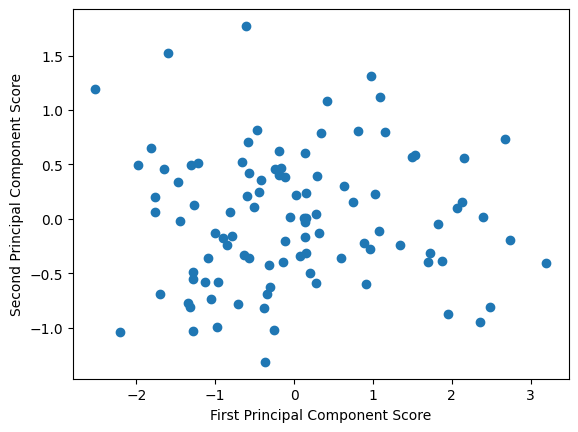

In [5]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

The three outliers likely have low PC1 scores and high PC2 scores. It’s likely that series_3 is contributing heavily to PC2, which explains why those points are outliers only in the Y direction (PC2). If series_3 has high positive values, it would push PC2 scores high.

But since PC1 is a mix of all three variables and series_1 and series_2 may be correlated, their individual contributions get entangled in PC1, making it hard to isolate their effects.

Some advantages are showing variance structure in lower dimensions, which is great for dimensionality reduction. It helps identify outliers (like the three points).

Some disadvantages and it is hard to interpret individual variable effects without knowing the loadings. Also, doesn’t directly show original variable values, some nuance is lost.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("IRENA_RenewableEnergy_Statistics_2000-2022.csv", encoding = 'latin -1')

# Peek at the data
print(df.shape)
print(df.columns)
df.head()


(35193, 12)
Index(['Region', 'Sub-region', 'Country', 'ISO3 code', 'M49 code',
       'RE or Non-RE', 'Group Technology', 'Technology', 'Producer Type',
       'Year', 'Electricity Generation (GWh)',
       'Electricity Installed Capacity (MW)'],
      dtype='object')


,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
0,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2000,24585.0,5459.01
1,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2001,25781.0,5455.50
2,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2002,26994.0,5891.01
3,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2003,28619.4,6013.24
4,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2004,30312.0,6305.24


Text(0.5, 1.0, 'Heatmap of Electricity Production by Region and Technology Group')

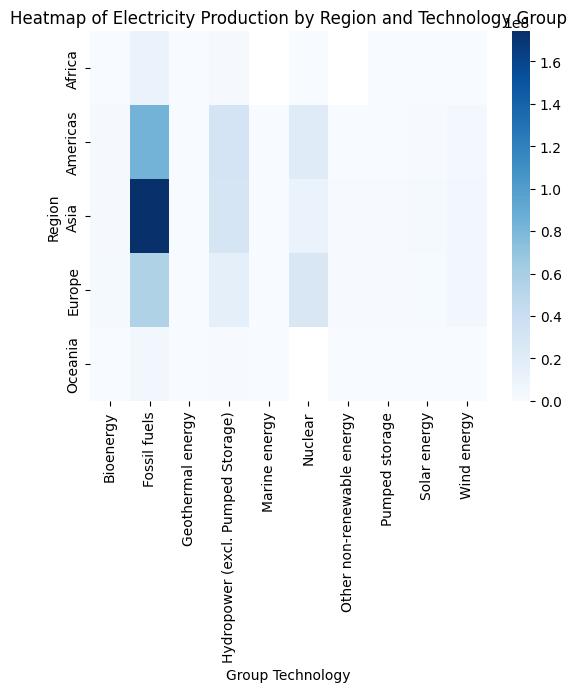

In [14]:
#The data are given as columns, so we must use a pivot_table to transform it into a two-dimensional grid.
pivot = df.pivot_table(index = ["Region"], columns = ["Group Technology"], values = "Electricity Generation (GWh)", aggfunc = "sum")

df_hmap = sns.heatmap(pivot, cmap = "Blues")
df_hmap.set_title("Heatmap of Electricity Production by Region and Technology Group")

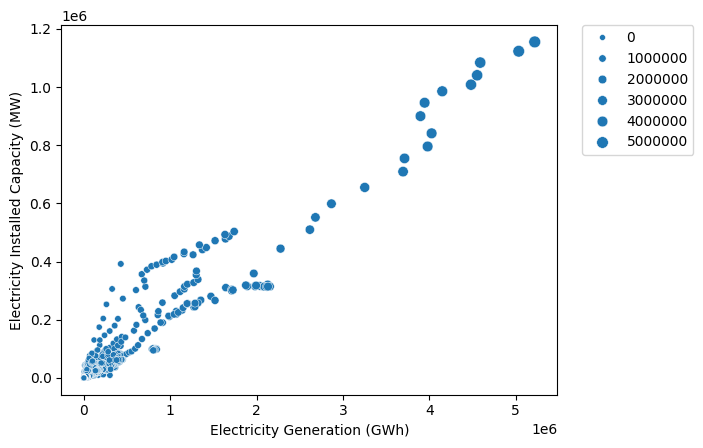

<Figure size 1000x600 with 0 Axes>

In [25]:
# Bubble plot of three numeric values

ax = sns.scatterplot(data = df, x = "Electricity Generation (GWh)", y = "Electricity Installed Capacity (MW)", size = "Electricity Generation (GWh)")

plt.figure(figsize=(10, 6))
ax.set_xlabel("Electricity Generation (GWh)")
ax.set_ylabel("Electricity Installed Capacity (MW)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

Variance explained by first component: 0.48970217409262534


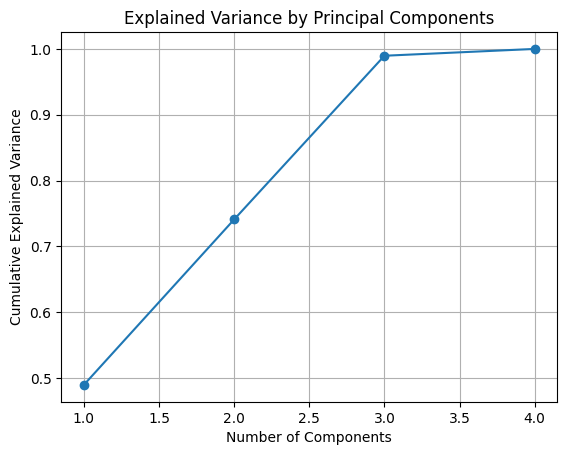

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Subset and scale the numeric data
X = df_numeric
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained
explained_variance = pca.explained_variance_ratio_
print("Variance explained by first component:", explained_variance[0])

# Plot cumulative variance
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Try predicting one feature using others
X = df_numeric.drop(columns=['Year'])  
y = df_numeric['Electricity Generation (GWh)']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", (y_test, y_pred))


R^2 Score: 1.0
RMSE: (30664    36762.283
4262       208.128
2593      6785.477
6587       235.206
2454         1.220
           ...    
22070        8.000
1906         0.420
26577      383.700
21365      479.249
23677    19779.538
Name: Electricity Generation (GWh), Length: 6319, dtype: float64, array([36762.283,   208.128,  6785.477, ...,   383.7  ,   479.249,
       19779.538], shape=(6319,)))


Renewable energy production trends generally increase over time — we expect this.

Some countries or regions may show surprising patterns (e.g., dips due to policy changes or disasters).

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

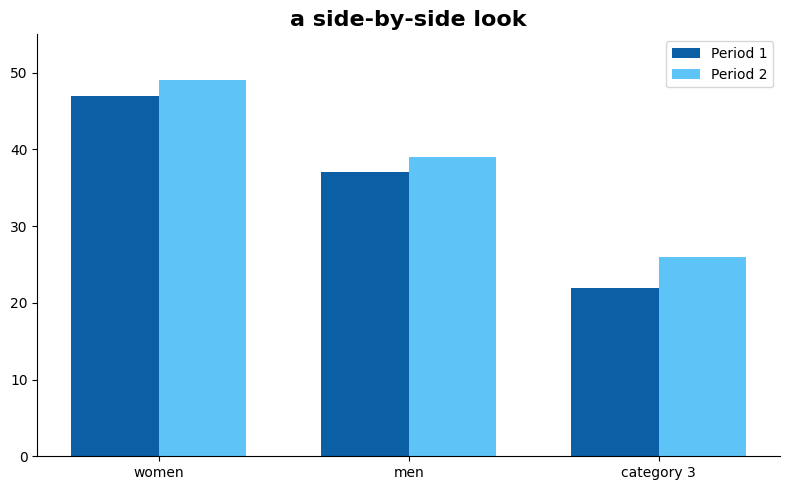

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Categories and values
categories = ['women', 'men', 'category 3']
period_1 = [47, 37, 22]
period_2 = [49, 39, 26]

x = np.arange(len(categories))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 5))

# Bars for each period
bars1 = ax.bar(x - width/2, period_1, width, label='Period 1', color='#0b5fa5')
bars2 = ax.bar(x + width/2, period_2, width, label='Period 2', color='#5ec4f8')

# Labels and formatting
ax.set_ylabel('')
ax.set_title('a side-by-side look', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 55)
ax.legend()

# Optional: Clean up spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()
